In [1]:
import xarray as xr
%matplotlib inline
from datetime import datetime,date, timedelta
import numpy as np

In [4]:
import pandas

In [241]:
# setting for the trip.

_eu_dis = 3889 #km
date_format = "%Y-%m-%d %H:%M:%S"
firstday = datetime.strptime('1959-02-22 09:00:00', date_format)
ntime = datetime.strptime('1959-02-28 12:00:00', date_format) - firstday
_eu_hours = ntime.seconds/60/60+ntime.days*24
_eu_speed = _eu_dis/_eu_hours  # km/h
_eu_speed


_af_dis = 5945 #km
firstday = datetime.strptime('1959-03-03 09:00:00', date_format)
ntime = datetime.strptime('1959-03-27 12:00:00', date_format) - firstday
_af_hours = ntime.seconds/60/60+ntime.days*24
_af_speed = _af_dis/_af_hours  # km/h
_af_speed

10.267702936096718

In [242]:
_eu_hours

147.0

In [243]:
_af_hours

579.0

##### _eu_speed

In [244]:
_sea_speed = 760/69

In [245]:
_sea_speed


11.014492753623188

In [37]:
def trans(time,lat,lon):
    #input: 
    #time = '01/31/1959 00:00'
    #lat = 70 to -10
    #lon = -20 to 10
    
    #return: nhour, nlat, nlon  -> read grib/NetCDF by loc

    date_format = "%Y-%m-%d %H:%M:%S"
    firstday = datetime.strptime('1959-02-01 00:00:00', date_format)
    ntime = time - firstday
    nlat = round((67 - lat)/0.1)
    nlon = round((0 - lon)/-0.1)
    nhour = ntime.days*24 + ntime.seconds//3600 # turn datetime.timedelta to hours

    return nhour,nlat,nlon


In [38]:
print(trans(pandas.to_datetime('1959-03-26 12:00:00'),70,5))

(1284, -30, 50)


In [39]:
# read
ds = xr.open_dataset(r'1959_2.nc')


In [136]:
# example for data structure
ds

<xarray.Dataset>
Dimensions:    (longitude: 151, latitude: 691, time: 1344)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 0.4 ... 14.7 14.8 14.9 15.0
  * latitude   (latitude) float32 67.0 66.9 66.8 66.7 ... -1.7 -1.8 -1.9 -2.0
  * time       (time) datetime64[ns] 2020-02-01 ... 2020-03-28T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    slhf       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    sshf       (time, latitude, longitude) float32 ...
    ssrd       (time, latitude, longitude) float32 ...
    strd       (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-05-15 23:00:06 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [137]:
ds.u10

<xarray.DataArray 'u10' (time: 1344, latitude: 691, longitude: 151)>
[140234304 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 0.4 ... 14.7 14.8 14.9 15.0
  * latitude   (latitude) float32 67.0 66.9 66.8 66.7 ... -1.7 -1.8 -1.9 -2.0
  * time       (time) datetime64[ns] 2020-02-01 ... 2020-03-28T23:00:00
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

In [138]:
#ds.values
#ds.dims
#ds.coords
#ds.attrs
#ds.coords["time"]
#ds['u10'].values
#ds.data_vars

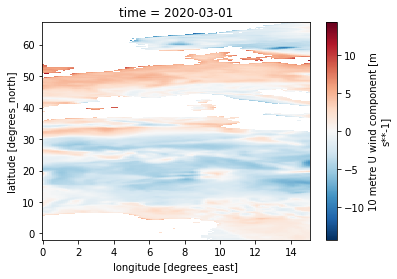

In [139]:
# example for indexing and plot data
_u10 = ds.u10.isel(time=672)   #or ds['u10']
#_u10.values[0][0]
_u10.plot()

In [40]:
import pandas
eu_df = pandas.read_csv('eu_timeseries.csv')

In [141]:
## start coupling

In [41]:
eu_df

,date,id,geometry,dis,ac_dis,lon,lat,time
0,2/22/1959 9:00,0,POINT Z (14.14222 66.31375 0),0.000000,0.000000,14.14222,66.31375,00:00.0
1,2/22/1959 10:00,274,POINT Z (13.80882 66.17607 0),0.365432,26.483992,13.80882,66.17607,00:03.9
2,2/22/1959 11:00,454,POINT Z (13.55049 66.0526 0),0.096933,52.934018,13.55049,66.05260,00:03.3
3,2/22/1959 12:00,600,POINT Z (13.24205 65.88588 0),0.434074,79.466111,13.24205,65.88588,00:13.8
4,2/22/1959 13:00,923,POINT Z (13.25929 65.69159 0),0.077134,105.894363,13.25929,65.69159,00:10.1
...,...,...,...,...,...,...,...,...
791,3/27/1959 8:00,14726,POINT Z (10.28748 -0.46898 0),0.386798,5904.076171,10.28748,-0.46898,00:51.7
792,3/27/1959 9:00,14781,POINT Z (10.24341 -0.51224 0),0.521126,5914.623866,10.24341,-0.51224,02:29.9
793,3/27/1959 10:00,14865,POINT Z (10.22548 -0.55987 0),0.222686,5924.484223,10.22548,-0.55987,00:07.1
794,3/27/1959 11:00,14936,POINT Z (10.22206 -0.63245 0),0.332269,5934.777231,10.22206,-0.63245,00:15.9


In [42]:
eu_df['date']

0       2/22/1959 9:00
1      2/22/1959 10:00
2      2/22/1959 11:00
3      2/22/1959 12:00
4      2/22/1959 13:00
            ...       
791     3/27/1959 8:00
792     3/27/1959 9:00
793    3/27/1959 10:00
794    3/27/1959 11:00
795    3/27/1959 12:00
Name: date, Length: 796, dtype: object

In [43]:
date_format = "%Y"
firstday = datetime.strptime('1959', date_format)
ntime = datetime.strptime('1959', date_format) - firstday


In [44]:
eu_df['date'] = pandas.to_datetime(eu_df['date']) + ntime

In [45]:
eu_df['date']

0     1959-02-22 09:00:00
1     1959-02-22 10:00:00
2     1959-02-22 11:00:00
3     1959-02-22 12:00:00
4     1959-02-22 13:00:00
              ...        
791   1959-03-27 08:00:00
792   1959-03-27 09:00:00
793   1959-03-27 10:00:00
794   1959-03-27 11:00:00
795   1959-03-27 12:00:00
Name: date, Length: 796, dtype: datetime64[ns]

In [46]:
for variable in ['u10','v10','t2m','skt','slhf','sshf','ssrd','strd','tp','d2m','sp']:
    print(variable)
    for index,row in eu_df.iterrows():
        _nhour,_nlat,_nlon = trans(row['date'],row['lat'],row['lon'])
        eu_df.loc[index,variable] = ds[variable].isel(time=_nhour,latitude=_nlat, longitude=_nlon).values


u10
v10
t2m
skt
slhf
sshf
ssrd
strd
tp
d2m
sp


In [15]:
eu_df

,date,id,geometry,dis,ac_dis,lon,lat,time,u10,v10,t2m,skt,slhf,sshf,ssrd,strd,tp,d2m,sp
0,2021-02-22 09:00:00,0,POINT Z (14.14222 66.31375 0),0.000000,0.000000,14.14222,66.31375,00:00.0,-2.026638,0.625731,264.697479,263.906647,-1.384217e+05,9.576265e+04,388856.0,9039323.0,0.002221,261.868134,97609.148438
1,2021-02-22 10:00:00,274,POINT Z (13.80882 66.17607 0),0.365432,26.483992,13.80882,66.17607,00:03.9,-2.421279,1.083659,265.799225,264.656616,-2.022427e+05,1.518171e+05,917891.0,9928863.0,0.001930,262.567505,98111.445312
2,2021-02-22 11:00:00,454,POINT Z (13.55049 66.0526 0),0.096933,52.934018,13.55049,66.05260,00:03.3,-2.493932,1.045200,266.643860,265.516479,-3.015198e+05,2.316526e+05,1610106.0,10708949.0,0.001744,263.139801,97802.710938
3,2021-02-22 12:00:00,600,POINT Z (13.24205 65.88588 0),0.434074,79.466111,13.24205,65.88588,00:13.8,-2.395960,1.362108,268.236542,267.795471,-4.629828e+05,2.163649e+05,2290604.0,11462973.0,0.001302,264.787323,98482.359375
4,2021-02-22 13:00:00,923,POINT Z (13.25929 65.69159 0),0.077134,105.894363,13.25929,65.69159,00:10.1,-2.178550,1.122119,267.139465,266.041779,-6.696374e+04,3.239444e+05,2777541.0,12217577.0,0.001040,264.349548,96154.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,2021-03-27 08:00:00,14726,POINT Z (10.28748 -0.46898 0),0.386798,5904.076171,10.28748,-0.46898,00:51.7,0.024171,0.486250,298.733826,299.350525,-4.766198e+05,-1.969666e+05,1224288.0,11988821.0,0.000047,297.275085,100741.351562
792,2021-03-27 09:00:00,14781,POINT Z (10.24341 -0.51224 0),0.521126,5914.623866,10.24341,-0.51224,02:29.9,-0.251582,0.991869,300.064758,300.115051,-1.005190e+06,-6.187916e+05,2914248.0,13463281.0,0.000051,296.428375,100395.304688
793,2021-03-27 10:00:00,14865,POINT Z (10.22548 -0.55987 0),0.222686,5924.484223,10.22548,-0.55987,00:07.1,-0.508621,0.952383,301.498077,301.631134,-2.024693e+06,-1.097804e+06,5106336.0,15022294.0,0.000042,296.096313,100456.406250
794,2021-03-27 11:00:00,14936,POINT Z (10.22206 -0.63245 0),0.332269,5934.777231,10.22206,-0.63245,00:15.9,-0.550452,0.932384,302.552124,302.807800,-3.132564e+06,-1.635135e+06,7475926.0,16580728.0,0.000114,295.975647,100307.718750


In [47]:
eu_df['skt'].mean()

292.35165211879405

In [48]:
eu_df["Time"] = pandas.to_datetime(eu_df['date'])

<AxesSubplot:xlabel='Time'>

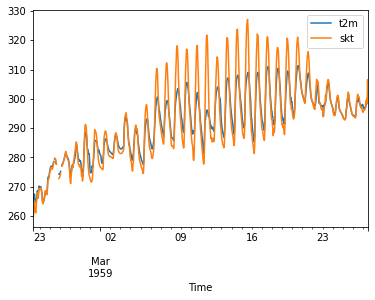

In [49]:
eu_df.plot(x='Time',y=['t2m','skt'])

In [50]:
eu_df['t2m_i'] = eu_df['t2m'].interpolate(method='polynomial', order=2)
eu_df['skt_i'] = eu_df['skt'].interpolate(method='polynomial', order=2)

In [51]:
#eu_df['strd']/3600  # turn J/hours to J/second (Watt)

<AxesSubplot:xlabel='Time'>

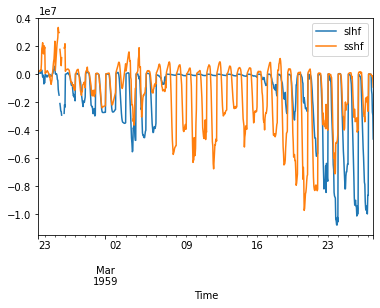

In [52]:
eu_df.plot(x='Time', y= ['slhf','sshf'])

# THE original is accumulative value in days.

<AxesSubplot:xlabel='Time'>

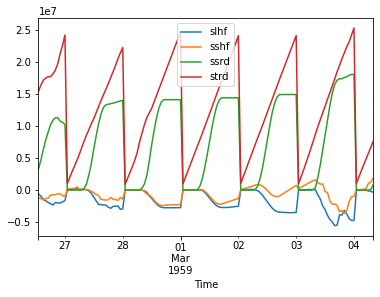

In [53]:
eu_df[100:240].plot(x='Time', y= ['slhf','sshf','ssrd','strd'])

In [54]:
eu_df.loc[159,['slhf','sshf','ssrd','strd']] = eu_df.loc[158,['slhf','sshf','ssrd','strd']]

# 

<AxesSubplot:xlabel='Time'>

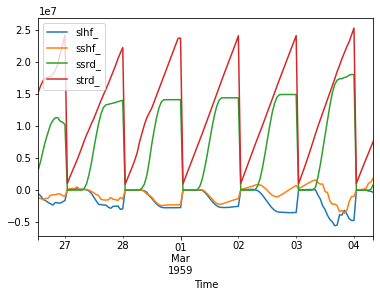

In [55]:
eu_df['slhf_'] = eu_df['slhf'].interpolate(method='linear', order=2)
eu_df['sshf_'] = eu_df['sshf'].interpolate(method='linear', order=2)
eu_df['ssrd_'] = eu_df['ssrd'].interpolate(method='linear', order=2)
eu_df['strd_'] = eu_df['strd'].interpolate(method='linear', order=2)
eu_df[100:240].plot(x='Time', y= ['slhf_','sshf_','ssrd_','strd_'])


<AxesSubplot:xlabel='Time'>

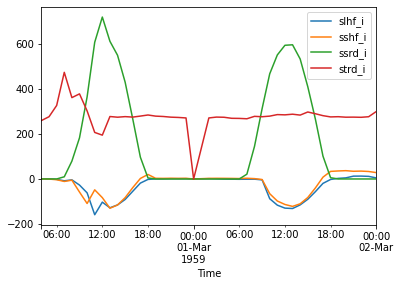

In [56]:
eu_df['slhf_i'] = [i if eu_df['Time'].loc[index].hour !=1 else np.nan for index,i in enumerate(eu_df['slhf_'].diff()/3600)]
eu_df['sshf_i'] = [i if eu_df['Time'].loc[index].hour !=1 else np.nan for index,i in enumerate(eu_df['sshf_'].diff()/3600)]
eu_df['ssrd_i'] = [i if eu_df['Time'].loc[index].hour !=1 else np.nan for index,i in enumerate(eu_df['ssrd_'].diff()/3600)]
eu_df['strd_i'] = [i if eu_df['Time'].loc[index].hour !=1 else np.nan for index,i in enumerate(eu_df['strd_'].diff()/3600)]
eu_df['slhf_i'] = eu_df['slhf_i'].interpolate(method='linear', order=2)
eu_df['sshf_i'] = eu_df['sshf_i'].interpolate(method='linear', order=2)
eu_df['ssrd_i'] = eu_df['ssrd_i'].interpolate(method='linear', order=2)
eu_df['strd_i'] = eu_df['strd_i'].interpolate(method='linear', order=2)
eu_df[139:184].plot(x='Time', y= ['slhf_i','sshf_i','ssrd_i','strd_i'])

In [65]:
eu_df.ssrd_i[eu_df.ssrd_i<0] = 0

C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_18028\651997075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_df.ssrd_i[eu_df.ssrd_i<0] = 0


<AxesSubplot:xlabel='Time'>

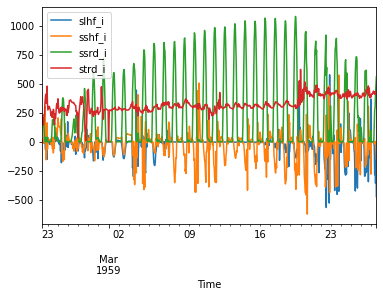

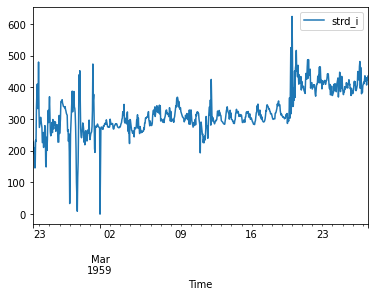

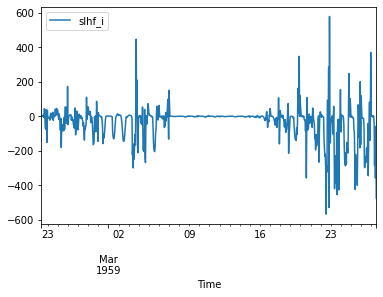

In [66]:
eu_df.plot(x='Time', y= ['slhf_i','sshf_i','ssrd_i','strd_i'])
eu_df.plot(x='Time', y= ['strd_i'])
eu_df.plot(x='Time', y= ['slhf_i'])

<AxesSubplot:xlabel='Time'>

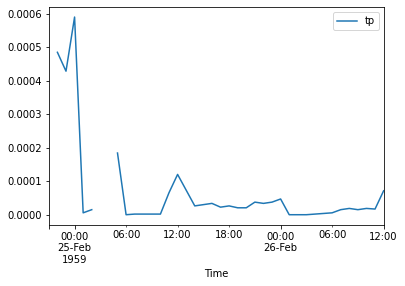

In [68]:
eu_df[60:100].plot(x='Time',y=['tp'])  # m/hour

<AxesSubplot:xlabel='Time'>

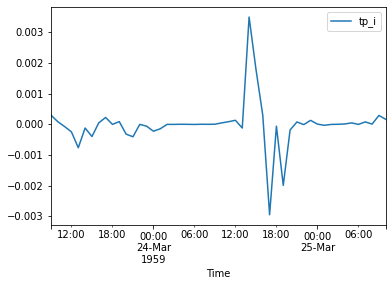

In [69]:
eu_df['tp_'] = eu_df['tp'].interpolate(method='polynomial', order=2)
eu_df['tp_i'] = [i if eu_df['Time'].loc[index].hour !=1 else np.nan for index,i in enumerate(eu_df['tp_'].diff())]
eu_df['tp_i'] = eu_df['tp_i'].interpolate(method='polynomial', order=2)
eu_df[-100:-50].plot(x='Time',y=['tp_i'])  # m/hour

<AxesSubplot:xlabel='Time'>

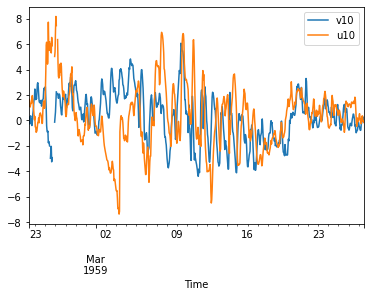

In [70]:
eu_df.plot(x='Time',y=['v10','u10'])

<AxesSubplot:xlabel='Time'>

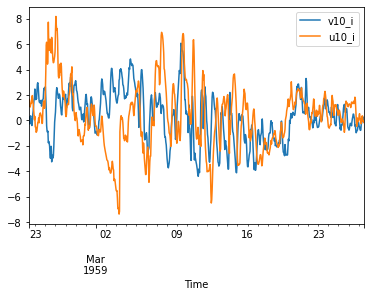

In [71]:
eu_df['v10_i'] = eu_df['v10'].interpolate(method='polynomial', order=2)
eu_df['u10_i'] = eu_df['u10'].interpolate(method='polynomial', order=2)
eu_df.plot(x='Time',y=['v10_i','u10_i'])

<AxesSubplot:xlabel='Time'>

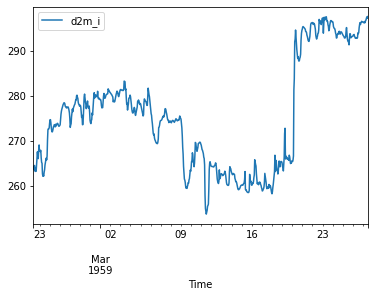

In [72]:
eu_df['d2m_i'] = eu_df['d2m'].interpolate(method='polynomial', order=2)
eu_df.plot(x='Time',y=['d2m_i'])


<AxesSubplot:xlabel='Time'>

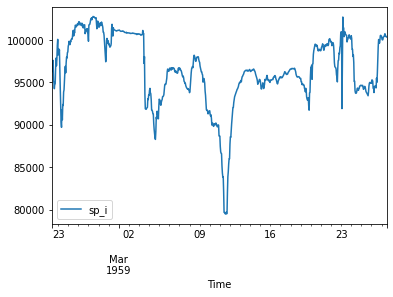

In [73]:
eu_df['sp_i'] = eu_df['sp'].interpolate(method='polynomial', order=2)
eu_df.plot(x='Time',y=['sp_i'])

In [74]:
eu_df.interpolate(method='bfill').to_csv('1d_1959.csv')